# Titanic ML Analisis


# Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import (
    cross_val_score,
    StratifiedKFold,
    train_test_split,
    GridSearchCV,
)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Step 2: Import Data


In [2]:
# Load the Titanic dataset into a pandas DataFrame
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")


# Step 3: Exploring Data


En esta sección exploramos la estructura de los datos, identificamos variables relevantes y buscamos patrones iniciales relacionados con la supervivencia.

In [3]:
# Display the first few rows of the dataset to understand its structure
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Display summary statistics of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [6]:
train_df.groupby(["Pclass"], as_index=False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
train_df.groupby(["Sex"], as_index=False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [8]:
train_df.groupby(["SibSp"], as_index=False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [9]:
train_df.groupby(["Parch"], as_index=False)["Survived"].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


# Step 4: Data Cleaning


In [10]:
train_df["Family_Size"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["Family_Size"] = test_df["SibSp"] + test_df["Parch"] + 1

In [11]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


In [12]:
train_df.groupby(["Family_Size"], as_index=False)["Survived"].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [13]:
family_map = {
    1: "Alone",
    2: "Small",
    3: "Small",
    4: "Small",
    5: "Medium",
    6: "Medium",
    7: "Large",
    8: "Large",
    9: "Large",
    11: "Large",
}
train_df["Family_Size_Grouped"] = train_df["Family_Size"].map(family_map)
test_df["Family_Size_Grouped"] = test_df["Family_Size"].map(family_map)

In [14]:
train_df.groupby(["Family_Size_Grouped"], as_index=False)["Survived"].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [15]:
train_df.groupby(["Embarked"], as_index=False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


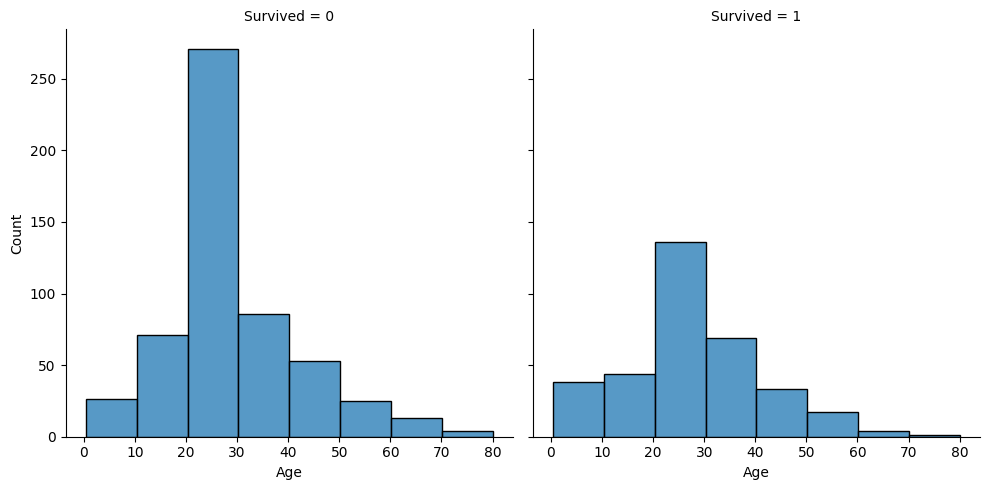

In [16]:
train_df.fillna(train_df["Age"].median(), inplace=True)
test_df.fillna(test_df["Age"].median(), inplace=True)


sns.displot(train_df, x="Age", col="Survived", binwidth=10, height=5)

In [17]:
train_df["Age_Cut"] = pd.qcut(train_df["Age"], 8, duplicates="drop")
test_df["Age_Cut"] = pd.qcut(test_df["Age"], 8, duplicates="drop")

In [18]:
train_df.groupby(["Age_Cut"], as_index=False)["Survived"].mean()

C:\Users\santi\AppData\Local\Temp\ipykernel_1368\3374983223.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Age_Cut"], as_index=False)["Survived"].mean()


,Age_Cut,Survived
0,"(0.419, 17.0]",0.539823
1,"(17.0, 22.0]",0.313559
2,"(22.0, 27.0]",0.405660
3,"(27.0, 28.0]",0.292079
4,"(28.0, 29.0]",0.363636
5,"(29.0, 35.0]",0.451327
6,"(35.0, 45.0]",0.394737
7,"(45.0, 80.0]",0.368932


In [19]:
# Para train_df
train_df.loc[train_df["Age"] <= 16, "Age"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 20.125), "Age"] = 1
train_df.loc[(train_df["Age"] > 20.125) & (train_df["Age"] <= 24), "Age"] = 2
train_df.loc[(train_df["Age"] > 24) & (train_df["Age"] <= 28), "Age"] = 3
train_df.loc[(train_df["Age"] > 28) & (train_df["Age"] <= 32.312), "Age"] = 4
train_df.loc[(train_df["Age"] > 32.312) & (train_df["Age"] <= 38), "Age"] = 5
train_df.loc[(train_df["Age"] > 38) & (train_df["Age"] <= 47), "Age"] = 6
train_df.loc[(train_df["Age"] > 47) & (train_df["Age"] <= 80), "Age"] = 7
train_df.loc[train_df["Age"] > 80, "Age"] = 8

# Para test_df
test_df.loc[test_df["Age"] <= 16, "Age"] = 0
test_df.loc[(test_df["Age"] > 16) & (test_df["Age"] <= 20.125), "Age"] = 1
test_df.loc[(test_df["Age"] > 20.125) & (test_df["Age"] <= 24), "Age"] = 2
test_df.loc[(test_df["Age"] > 24) & (test_df["Age"] <= 28), "Age"] = 3
test_df.loc[(test_df["Age"] > 28) & (test_df["Age"] <= 32.312), "Age"] = 4
test_df.loc[(test_df["Age"] > 32.312) & (test_df["Age"] <= 38), "Age"] = 5
test_df.loc[(test_df["Age"] > 38) & (test_df["Age"] <= 47), "Age"] = 6
test_df.loc[(test_df["Age"] > 47) & (test_df["Age"] <= 80), "Age"] = 7
test_df.loc[test_df["Age"] > 80, "Age"] = 8

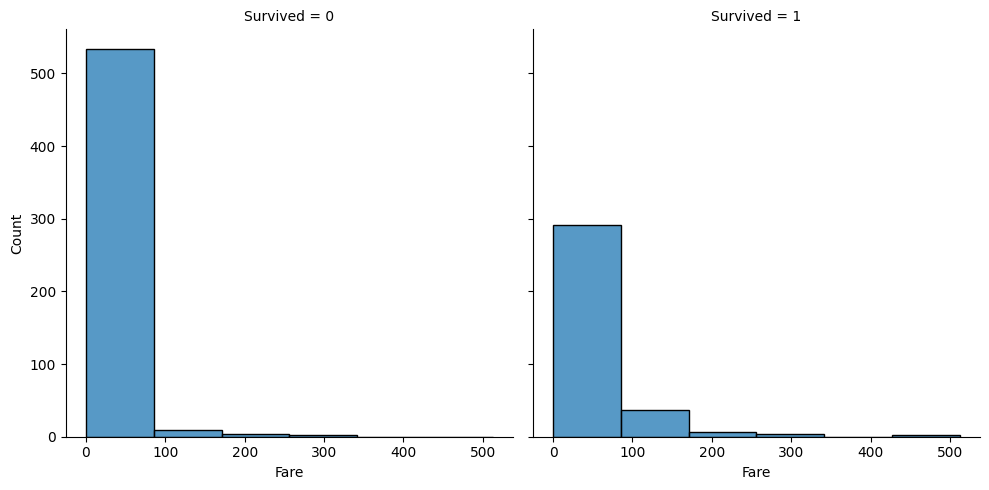

In [20]:
sns.displot(train_df, x="Fare", col="Survived", binwidth=80, height=5)

In [21]:
train_df["Fare_cut"] = pd.qcut(train_df["Fare"], 6)
test_df["Fare_cut"] = pd.qcut(test_df["Fare"], 6)

In [22]:
train_df.groupby(["Fare_cut"], as_index=False)["Survived"].mean()

C:\Users\santi\AppData\Local\Temp\ipykernel_1368\1803230786.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Fare_cut"], as_index=False)["Survived"].mean()


,Fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [23]:
train_df.loc[train_df["Fare"] <= 7.775, "Fare"] = 0
train_df.loc[(train_df["Fare"] > 7.775) & (train_df["Fare"] <= 8.662), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 8.662) & (train_df["Fare"] <= 14.454), "Fare"] = 2
train_df.loc[(train_df["Fare"] > 14.454) & (train_df["Fare"] <= 26), "Fare"] = 3
train_df.loc[(train_df["Fare"] > 26) & (train_df["Fare"] <= 52.369), "Fare"] = 4
train_df.loc[(train_df["Fare"] > 52.369) & (train_df["Fare"] <= 512.329), "Fare"] = 5
train_df.loc[train_df["Fare"] > 512.329, "Fare"] = 6

test_df.loc[test_df["Fare"] <= 7.775, "Fare"] = 0
test_df.loc[(test_df["Fare"] > 7.775) & (test_df["Fare"] <= 8.662), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 8.662) & (test_df["Fare"] <= 14.454), "Fare"] = 2
test_df.loc[(test_df["Fare"] > 14.454) & (test_df["Fare"] <= 26), "Fare"] = 3
test_df.loc[(test_df["Fare"] > 26) & (test_df["Fare"] <= 52.369), "Fare"] = 4
test_df.loc[(test_df["Fare"] > 52.369) & (test_df["Fare"] <= 512.329), "Fare"] = 5
test_df.loc[test_df["Fare"] > 512.329, "Fare"] = 6

In [24]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [25]:
train_df["Title"] = (
    train_df["Name"]
    .str.split(pat=",", expand=True)[1]
    .str.split(pat=".", expand=True)[0]
    .apply(lambda x: x.strip())
)
test_df["Title"] = (
    test_df["Name"]
    .str.split(pat=",", expand=True)[1]
    .str.split(pat=".", expand=True)[0]
    .apply(lambda x: x.strip())
)

In [26]:
train_df.groupby(["Title"], as_index=False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [134]:
title_map = {
    "Capt": "military", "Major": "military", "Col": "military",
    "Sir": "nobility", "Lady": "nobility", "Don": "nobility",
    "Jonkheer": "nobility", "the Countess": "nobility", "Ms": "nobility",
    "Miss": "unmarried_women", "Mlle": "unmarried_women",
    "Mrs": "married_women", "Mme": "married_women",
    "Rev": "religious"
}

# For train_df
train_df["Title"] = train_df["Title"].replace(title_map)

# For test_df
test_df["Title"] = test_df["Title"].replace(title_map)

In [135]:
train_df.groupby(["Title"], as_index=False)["Survived"].agg(["count", "mean"])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Mr,517,0.156673
3,married_women,126,0.793651
4,military,5,0.400000
5,nobility,6,0.666667
6,religious,6,0.000000
7,unmarried_women,184,0.701087


In [29]:
train_df["Name_Length"] = train_df["Name"].apply(lambda x: len(x))
test_df["Name_Length"] = test_df["Name"].apply(lambda x: len(x))

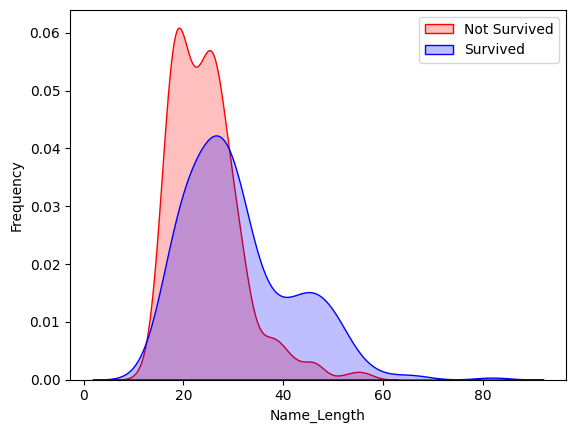

In [30]:
g = sns.kdeplot(
    train_df["Name_Length"][
        (train_df["Survived"] == 0) & (train_df["Name_Length"].notnull())
    ],
    color="Red",
    fill=True,
)
g = sns.kdeplot(
    train_df["Name_Length"][
        (train_df["Survived"] == 1) & (train_df["Name_Length"].notnull())
    ],
    ax=g,
    color="Blue",
    fill=True,
)
g.set_xlabel("Name_Length")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived", "Survived"])

In [31]:
train_df["Name_LengthGB"] = pd.qcut(train_df["Name_Length"], 8)
test_df["Name_LengthGB"] = pd.qcut(test_df["Name_Length"], 8)

In [32]:
train_df.groupby(["Name_LengthGB"], as_index=False)["Survived"].mean()

C:\Users\santi\AppData\Local\Temp\ipykernel_1368\2462539209.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Name_LengthGB"], as_index=False)["Survived"].mean()


,Name_LengthGB,Survived
0,"(11.999, 18.0]",0.214286
1,"(18.0, 20.0]",0.252427
2,"(20.0, 23.0]",0.307692
3,"(23.0, 25.0]",0.346939
4,"(25.0, 27.25]",0.292929
5,"(27.25, 30.0]",0.428571
6,"(30.0, 38.0]",0.517241
7,"(38.0, 82.0]",0.745283


In [33]:
train_df.loc[train_df["Name_Length"] <= 18, "Name_Size"] = 0
train_df.loc[
    (train_df["Name_Length"] > 18) & (train_df["Name_Length"] <= 20), "Name_Size"
] = 1
train_df.loc[
    (train_df["Name_Length"] > 20) & (train_df["Name_Length"] <= 23), "Name_Size"
] = 2
train_df.loc[
    (train_df["Name_Length"] > 23) & (train_df["Name_Length"] <= 25), "Name_Size"
] = 3
train_df.loc[
    (train_df["Name_Length"] > 25) & (train_df["Name_Length"] <= 27.25), "Name_Size"
] = 4
train_df.loc[
    (train_df["Name_Length"] > 27.25) & (train_df["Name_Length"] <= 30), "Name_Size"
] = 5
train_df.loc[
    (train_df["Name_Length"] > 30) & (train_df["Name_Length"] <= 38), "Name_Size"
] = 6
train_df.loc[
    (train_df["Name_Length"] > 38) & (train_df["Name_Length"] <= 82), "Name_Size"
] = 7
train_df.loc[train_df["Name_Length"] > 82, "Name_Size"] = 8

test_df.loc[test_df["Name_Length"] <= 18, "Name_Size"] = 0
test_df.loc[
    (test_df["Name_Length"] > 18) & (test_df["Name_Length"] <= 20), "Name_Size"
] = 1
test_df.loc[
    (test_df["Name_Length"] > 20) & (test_df["Name_Length"] <= 23), "Name_Size"
] = 2
test_df.loc[
    (test_df["Name_Length"] > 23) & (test_df["Name_Length"] <= 25), "Name_Size"
] = 3
test_df.loc[
    (test_df["Name_Length"] > 25) & (test_df["Name_Length"] <= 27.25), "Name_Size"
] = 4
test_df.loc[
    (test_df["Name_Length"] > 27.25) & (test_df["Name_Length"] <= 30), "Name_Size"
] = 5
test_df.loc[
    (test_df["Name_Length"] > 30) & (test_df["Name_Length"] <= 38), "Name_Size"
] = 6
test_df.loc[
    (test_df["Name_Length"] > 38) & (test_df["Name_Length"] <= 82), "Name_Size"
] = 7
test_df.loc[test_df["Name_Length"] > 82, "Name_Size"] = 8

In [34]:
train_df["Ticket"]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [35]:
train_df["TicketNumber"] = train_df["Ticket"].apply(
    lambda x: pd.Series({"Ticket": x.split()[-1]})
)
test_df["TicketNumber"] = test_df["Ticket"].apply(
    lambda x: pd.Series({"Ticket": x.split()[-1]})
)

In [36]:
train_df.groupby(["TicketNumber"], as_index=False)["Survived"].agg(
    ["count", "mean"]
).sort_values("count", ascending=False)

,TicketNumber,count,mean
196,2343,7,0.000000
464,347082,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
674,8475,1,0.000000
675,851,1,0.000000
676,9234,1,1.000000
63,11769,1,1.000000


In [37]:
train_df.groupby("TicketNumber")["TicketNumber"].transform("count")

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [38]:
train_df["TicketNumberCounts"] = train_df.groupby("TicketNumber")[
    "TicketNumber"
].transform("count")
test_df["TicketNumberCounts"] = test_df.groupby("TicketNumber")[
    "TicketNumber"
].transform("count")

In [39]:
train_df.groupby(["TicketNumberCounts"], as_index=False)["Survived"].agg(
    ["count", "mean"]
).sort_values("count", ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [40]:
train_df["TicketLocation"] = np.where(
    train_df["Ticket"].str.split(pat=" ", expand=True)[1].notna(),
    train_df["Ticket"].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()),
    "Blank",
)
test_df["TicketLocation"] = np.where(
    test_df["Ticket"].str.split(pat=" ", expand=True)[1].notna(),
    test_df["Ticket"].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()),
    "Blank",
)

In [41]:
train_df["TicketLocation"].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
A/5.            7
SOTON/OQ        7
STON/O2.        6
CA              6
C               5
S.O.C.          5
SC/PARIS        5
F.C.C.          5
SC/Paris        4
A/4.            3
PP              3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
A4.             1
W.E.P.          1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [42]:
train_df["TicketLocation"] = train_df["TicketLocation"].replace(
    {
        "SOTON/O.Q.": "SOTON/OQ",
        "C.A.": "CA",
        "CA.": "CA",
        "SC/PARIS": "SC/Paris",
        "S.C./PARIS": "SC/Paris",
        "A/4.": "A/4",
        "A/5.": "A/5",
        "A.5.": "A/5",
        "A./5.": "A/5",
        "W./C.": "W/C",
    }
)

test_df["TicketLocation"] = test_df["TicketLocation"].replace(
    {
        "SOTON/O.Q.": "SOTON/OQ",
        "C.A.": "CA",
        "CA.": "CA",
        "SC/PARIS": "SC/Paris",
        "S.C./PARIS": "SC/Paris",
        "A/4.": "A/4",
        "A/5.": "A/5",
        "A.5.": "A/5",
        "A./5.": "A/5",
        "W./C.": "W/C",
    }
)

In [43]:
train_df.groupby(["TicketLocation"], as_index=False)["Survived"].agg(["count", "mean"])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


### cabin analisis


In [44]:
# Fill NA values with 'U' and extract first character of cabin
train_df["Cabin"] = train_df["Cabin"].fillna("U")
train_df["Cabin"] = train_df["Cabin"].str[0]

test_df["Cabin"] = test_df["Cabin"].fillna("U")
test_df["Cabin"] = test_df["Cabin"].str[0]

In [45]:
train_df.groupby(["Cabin"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000


In [46]:
train_df["Cabin_Assigned"] = train_df["Cabin"].apply(lambda x: 0 if x in ["U"] else 1)
test_df["Cabin_Assigned"] = test_df["Cabin"].apply(lambda x: 0 if x in ["U"] else 1)

In [47]:
train_df.groupby(["Cabin_Assigned"], as_index=False)["Survived"].agg(["count", "mean"])

,Cabin_Assigned,count,mean
0,1,891,0.383838


### After arragements


In [48]:
train_df.shape

(891, 24)

In [49]:
test_df.shape

(418, 23)

## Initial CleanUp


In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  891 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                204 non-null    object  
 11  Embarked             891 non-null    object  
 12  Family_Size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_Cut              891 non-null    category
 15  Fare_cut             89

In [51]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [133]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_Size',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_cut', 'Title', 'Name_Length',
       'Name_LengthGB', 'Name_Size', 'TicketNumber', 'TicketNumberCounts',
       'TicketLocation', 'Cabin_Assigned'],
      dtype='object')

In [52]:
train_df["Age"] = train_df["Age"].fillna(train_df["Age"].mean())
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].mean())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

# Training


### asingning encoders


In [53]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy="most_frequent")

In [54]:
ode_cols = ["Family_Size_Grouped"]
ohe_cols = ["Sex", "Embarked"]

##


<Axes: >

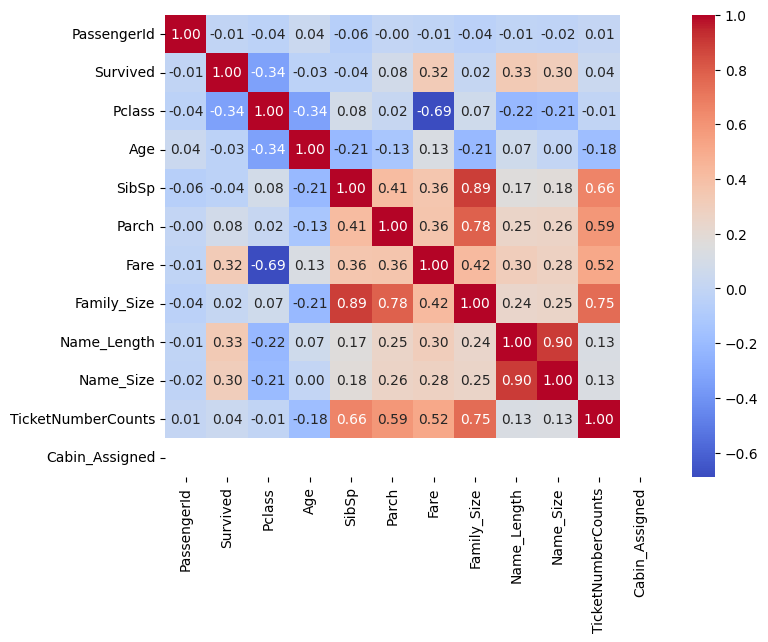

In [55]:
correlation_matrix = train_df.corr(numeric_only=True)
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

## making the tests


In [56]:
X = train_df.drop(["Survived", "SibSp", "Parch"], axis=1)
y = train_df["Survived"]
X_test = test_df.drop(["Age_Cut", "Fare_cut", "SibSp", "Parch"], axis=1)

In [57]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y)

In [58]:
ordinal_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ]
)

In [59]:
ohe_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
    ]
)

In [60]:
numerical_pipeline = Pipeline([("impute", SimpleImputer(strategy="median"))])

In [136]:
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(
    transformers=[
        ("ord_pipeline", ordinal_pipeline, ode_cols),
        ("ohe_pipeline", ohe_pipeline, ohe_cols),
        (
            "num_pipeline",
            numerical_pipeline,
            [
                "Pclass",
                "Age",
                "Fare",
                "Cabin_Assigned",
                "Name_Size",
                "TicketNumberCounts",
            ],
        ),
    ],
    remainder="drop",
    n_jobs=-1,
)

### algo distinto

In [159]:
# 1. Definir columnas finales útiles
num_cols = ["Pclass", "Age", "Fare", "Cabin_Assigned", "Name_Size", "TicketNumberCounts"]
ohe_cols = ["Sex", "Embarked", "Title", "TicketLocation"]
ode_cols = ["Family_Size_Grouped", "Age_Cut", "Fare_cut", "Name_LengthGB"]

# 2. Convertir columnas categóricas a string
for col in ohe_cols + ode_cols:
    train_df[col] = train_df[col].astype(str)
    test_df[col] = test_df[col].astype(str)

# 3. Crear datasets X e y
X = train_df[num_cols + ohe_cols + ode_cols]
y = train_df["Survived"]
X_test = test_df[num_cols + ohe_cols + ode_cols]

# 4. Split para validación
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y)

# 5. Pipelines para cada tipo de columna
ordinal_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("ord", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
])

ohe_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)),
])

numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
])

# 6. ColumnTransformer
col_trans = ColumnTransformer(transformers=[
    ("ord_pipeline", ordinal_pipeline, ode_cols),
    ("ohe_pipeline", ohe_pipeline, ohe_cols),
    ("num_pipeline", numerical_pipeline, num_cols),
], remainder="drop", n_jobs=-1)


In [163]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [150, 200, 300, 500],
    "min_samples_split": [5, 10, 15],
    "max_depth": [10, 13, 15, 17, 20],
    "min_samples_leaf": [2, 4, 5, 6],
    "criterion": ["gini", "entropy"],
}

CV_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1
)


In [164]:
# Pipeline final con el preprocesador y el modelo
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped',
                                                   'Age_Cut', 'Fare_cut',
                                                   'Name_LengthGB']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   Simple...
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [165]:
print("Mejores parámetros:", CV_rfc.best_params_)
print("Mejor score CV:", CV_rfc.best_score_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Mejor score CV: 0.8272825765783512


### Bosque Aleatorio


In [62]:
rfc = RandomForestClassifier()

In [63]:
param_grid = {
    "n_estimators": [150, 200, 300, 500],
    "min_samples_split": [5, 10, 15],
    "max_depth": [10, 13, 15, 17, 20],
    "min_samples_leaf": [2, 4, 5, 6],
    "criterion": ["gini", "entropy"],
}

In [64]:
CV_rfc = GridSearchCV(
    estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)
)

In [65]:
# Ensure categorical columns are string type for encoders
for col in ode_cols + ohe_cols:
	X_train[col] = X_train[col].astype(str)
	X_valid[col] = X_valid[col].astype(str)

pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [158]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}
0.8160445188614203


### DecisionTreeClassifier


In [67]:
dtc = DecisionTreeClassifier()

In [68]:
param_grid = {
    "min_samples_split": [5, 10, 15],
    "max_depth": [10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

In [69]:
CV_dtc = GridSearchCV(
    estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)
)

In [70]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [71]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.7977839062346105


### KNeighbors Classifier


In [72]:
knn = KNeighborsClassifier()

In [73]:
param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

In [74]:
CV_knn = GridSearchCV(
    estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)
)

In [75]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [76]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.783709248497981


### SVC


In [77]:
svc = SVC(probability=True)

In [78]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [79]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [80]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [81]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8062543090712107


### LogisticRegression


In [82]:
lr = LogisticRegression()

In [83]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [84]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [85]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

c:\SANTI-ARCHIVOS\Santi\Data-Science-Projects\Titanic-Project\titanic-analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [86]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 100}
0.7837584950261006


### GaussianNB


In [87]:
gnb = GaussianNB()

In [88]:
param_grid = {
    "var_smoothing": [0.00000001, 0.000000001, 0.00000001],
}

In [89]:
CV_gnb = GridSearchCV(
    estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)
)

In [90]:
pipefinalgnb = make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [91]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.720535802225943


### AdaBoostClassifier


In [92]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

In [93]:
dtc_2 = DecisionTreeClassifier(
    criterion="entropy", max_depth=10, min_samples_leaf=4, min_samples_split=10
)
svc_2 = SVC(probability=True, C=10, kernel="rbf")
lr_2 = LogisticRegression(C=0.1)
lr_3 = LogisticRegression(C=0.2)
lr_4 = LogisticRegression(C=0.05)

In [94]:
param_grid = {
    "estimator": [dtc_2, svc_2, lr_2],
    "n_estimators": [5, 10, 25, 50, 100],
    "learning_rate": [(0.97 + x / 100) for x in range(1, 7)],
}

In [95]:
CV_abc = GridSearchCV(
    estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5)
)

In [96]:
pipefinalabc = make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=AdaBoostClassifier(),
                              param_grid={'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=10,
                                                                               min_samples_leaf=4,
                                                                               min_samples_split=10),
                                                        SVC(C=10,
                                                            probability=True),
                                                        LogisticRegression(C=0.1)],
                                          'learning_rate': [0.98, 0.99, 1.0,
                                                            1.01, 1.02, 1.03],
                                          'n_estimators': [5, 10, 25, 50,
                                                           100]}))])

In [97]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), 'learning_rate': 1.02, 'n_estimators': 25}
0.7851964936471979


### ExtraTreesClassifier


In [98]:
from sklearn.ensemble import ExtraTreesClassifier


etc = ExtraTreesClassifier()

In [99]:
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

In [100]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [101]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Pclass', 'Age', 'Fare',
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreesClassifier(),
                              param_grid={'max_features': [1, 3, 10],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10],
                                          'n_estimators': [100, 300]}))])

In [102]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

{'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
0.8076233625529401


### Gradient Boosting Classifier


In [103]:
from sklearn.ensemble import GradientBoostingClassifier

In [104]:
GBC = GradientBoostingClassifier()

In [105]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [106]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [107]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'Cabin_Assigned',
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [108]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 500}
0.8159755737220525


## Voting


In [109]:
from sklearn.ensemble import VotingClassifier


vc1 = VotingClassifier(
    [
        ("gbc", CV_gbc.best_estimator_),
        ("etc", CV_etc.best_estimator_),
        ("nb", CV_gnb.best_estimator_),
    ],
    voting="hard",
    weights=[1, 2, 3],
)

In [110]:
vc2 = VotingClassifier(
    [
        ("abc", CV_abc.best_estimator_),
        ("etc", CV_etc.best_estimator_),
        ("nb", CV_gnb.best_estimator_),
    ],
    voting="hard",
    weights=[1, 2, 3],
)

In [111]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

In [112]:
pipefinalcv2 = make_pipeline(col_trans, vc2)

In [113]:
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'Name_Size',
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gbc',
                                               GradientBoostingClassifier(max_depth=8,
                                                                          max_features=0.3,
                                                                          min_samples_leaf=100,
                                                                          n_estimators=500)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=10,
                                                                    n_estimators=300)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [114]:
pipefinalcv2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                 VotingClassifier(estimators=[('abc',
                                               AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                   max_depth=10,
                                                                                                   min_samples_leaf=4,
                                                                                                   min_samples_split=10),
                                                                  learning_rate=1.02,
                                                                  n_estimators=25)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3,
                                                                    min_samples_split=10,
                                                                    n_estimators=300)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [115]:
Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalabc.predict(X_test)
Y_pred8 = pipefinaletc.predict(X_test)
Y_pred9 = pipefinalgbc.predict(X_test)
Y_pred10 = pipefinalcv1.predict(X_test)
Y_pred11 = pipefinalcv2.predict(X_test)

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelos = {
    "RandomForest": pipefinalrfc,
    "DecisionTree": pipefinaldtc,
    "KNN": pipefinalknn,
    "SVC": pipefinalsvc,
    "LogReg": pipefinallr,
    "NaiveBayes": pipefinalgnb,
    "AdaBoost": pipefinalabc,
    "ExtraTrees": pipefinaletc,
    "GradientBoosting": pipefinalgbc,
    "CV1": pipefinalcv1,
    "CV2": pipefinalcv2,
}

for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    print(f"{nombre} -> Accuracy: {acc:.4f}, F1-score: {f1:.4f}")


RandomForest -> Accuracy: 0.8771, F1-score: 0.8333
DecisionTree -> Accuracy: 0.7654, F1-score: 0.7162
KNN -> Accuracy: 0.8492, F1-score: 0.7907
SVC -> Accuracy: 0.8715, F1-score: 0.8244
LogReg -> Accuracy: 0.8324, F1-score: 0.7727
NaiveBayes -> Accuracy: 0.6983, F1-score: 0.3864
AdaBoost -> Accuracy: 0.8045, F1-score: 0.7586
ExtraTrees -> Accuracy: 0.8715, F1-score: 0.8244
GradientBoosting -> Accuracy: 0.8324, F1-score: 0.7541
CV1 -> Accuracy: 0.6983, F1-score: 0.3864
CV2 -> Accuracy: 0.6983, F1-score: 0.3864


In [116]:
Y_pred11 = pipefinalcv2.predict(X_test)

In [169]:
# Crear DataFrames de predicciones
submission_rfc = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred})
submission_dtc = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred2})
submission_knn = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred3})
submission_svc = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred4})
submission_lr = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred5})
submission_nb = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred6})
submission_ada = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred7})
submission_etc = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred8})
submission_gbc = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred9})
submission_vc_soft = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred10})
submission_vc_hard = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": Y_pred11})

In [170]:
# Exportar los CSV con nombres de archivo descriptivos
submission_rfc.to_csv("./submissions/random_forest.csv", index=False)
submission_dtc.to_csv("./submissions/decision_tree.csv", index=False)
submission_knn.to_csv("./submissions/knn.csv", index=False)
submission_svc.to_csv("./submissions/svc.csv", index=False)
submission_lr.to_csv("./submissions/logistic_regression.csv", index=False)
submission_nb.to_csv("./submissions/naive_bayes.csv", index=False)
submission_ada.to_csv("./submissions/adaboost.csv", index=False)
submission_etc.to_csv("./submissions/extra_trees.csv", index=False)
submission_gbc.to_csv("./submissions/gradient_boosting.csv", index=False)
submission_vc_soft.to_csv("./submissions/voting_classifier_soft.csv", index=False)
submission_vc_hard.to_csv("./submissions/voting_classifier_hard.csv", index=False)

# Guardando el modelo


In [166]:
import joblib

joblib.dump(pipefinalrfc, "modelo_titanic_rfc.pkl")

print("Modelo Random Forest guardado exitosamente.")

Modelo Random Forest guardado exitosamente.


In [167]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Cabin_Assigned', 'Name_Size',
       'TicketNumberCounts', 'Sex', 'Embarked', 'Title', 'TicketLocation',
       'Family_Size_Grouped', 'Age_Cut', 'Fare_cut', 'Name_LengthGB'],
      dtype='object')

In [168]:
print(X_train.dtypes)

Pclass                   int64
Age                    float64
Fare                   float64
Cabin_Assigned           int64
Name_Size              float64
TicketNumberCounts       int64
Sex                     object
Embarked                object
Title                   object
TicketLocation          object
Family_Size_Grouped     object
Age_Cut                 object
Fare_cut                object
Name_LengthGB           object
dtype: object


In [124]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Size,...,Age_Cut,Fare_cut,Title,Name_Length,Name_LengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_Assigned
300,301,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,3.0,9234,0.0,NaN,Q,1,...,"(27.0, 28.0]","(-0.001, 7.775]",unmarried_women,40,"(38.0, 82.0]",7.0,9234,1,Blank,1
873,874,3,"Vander Cruyssen, Mr. Victor",male,6.0,345765,2.0,NaN,S,1,...,"(45.0, 80.0]","(8.662, 14.454]",Mr,27,"(25.0, 27.25]",4.0,345765,1,Blank,1
542,543,3,"Andersson, Miss. Sigrid Elisabeth",female,0.0,347082,4.0,NaN,S,7,...,"(0.419, 17.0]","(26.0, 52.369]",unmarried_women,33,"(30.0, 38.0]",6.0,347082,7,Blank,1
324,325,3,"Sage, Mr. George John Jr",male,3.0,CA. 2343,5.0,NaN,S,11,...,"(27.0, 28.0]","(52.369, 512.329]",Mr,24,"(23.0, 25.0]",3.0,2343,7,CA,1
538,539,3,"Risien, Mr. Samuel Beard",male,3.0,364498,3.0,NaN,S,1,...,"(27.0, 28.0]","(14.454, 26.0]",Mr,24,"(23.0, 25.0]",3.0,364498,1,Blank,1


In [ ]:
pipefinalrfc.predict_proba(X)

In [154]:
nuevo_dato = X_test.iloc[[11]]

prediccion = pipefinalrfc.predict(nuevo_dato)[0]
proba = pipefinalrfc.predict_proba(nuevo_dato)[0]

print(f"Probabilidad de NO sobrevivir: {proba[0]*100:.2f}%")
print(f"Probabilidad de SOBREVIVIR: {proba[1]*100:.2f}%")

if prediccion == 1:
    print("→ Predicción final: SOBREVIVIRÍAS")
else:
    print("→ Predicción final: NO sobrevivirías")

Probabilidad de NO sobrevivir: 89.20%
Probabilidad de SOBREVIVIR: 10.80%
→ Predicción final: NO sobrevivirías
